<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-2-Kaggle-Challenge/blob/master/Jisha_Obukwelu_DSPT3_222_Kaggle_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [x] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [x] Continue to participate in our Kaggle challenge.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [x] Try Ordinal Encoding.
- [x] Try a Random Forest Classifier.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [x] Add your own stretch goal(s) !
- [x] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [x] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [x] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [17]:
!pip install category_encoders

In [0]:
# Import

%matplotlib inline
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [21]:
# Train/Validate/Test split the data
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train['status_group'], random_state=4
)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [22]:
train.groupby('quality_group')['status_group'].value_counts(normalize=True)
#seems that good and functional correlate

quality_group  status_group           
colored        functional                 0.501266
               non functional             0.389873
               functional needs repair    0.108861
fluoride       functional                 0.708571
               non functional             0.222857
               functional needs repair    0.068571
good           functional                 0.565896
               non functional             0.357505
               functional needs repair    0.076599
milky          functional                 0.542636
               non functional             0.435659
               functional needs repair    0.021705
salty          non functional             0.478470
               functional                 0.463315
               functional needs repair    0.058215
unknown        non functional             0.840186
               functional                 0.139920
               functional needs repair    0.019894
Name: status_group, dtype: float64

In [23]:
train.groupby('quantity')['status_group'].value_counts(normalize=True)
#Category enough also seems to be an indicator of functionality

quantity      status_group           
dry           non functional             0.970488
              functional                 0.023690
              functional needs repair    0.005822
enough        functional                 0.651961
              non functional             0.275728
              functional needs repair    0.072310
insufficient  functional                 0.524583
              non functional             0.380795
              functional needs repair    0.094621
seasonal      functional                 0.572674
              non functional             0.319950
              functional needs repair    0.107376
unknown       non functional             0.714734
              functional                 0.266458
              functional needs repair    0.018809
Name: status_group, dtype: float64

In [0]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                        'population', 'gps_height']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (all the same), id (can't glean useful info), num_private(mostly 0s)
    unused = ['recorded_by']
    X = X.drop(columns=unused)

    # Changing region and district code into categories rather than ints
    X['region_code'] = X['region_code'].astype('str')
    X['district_code'] = X['district_code'].astype('str')

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
   
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years_till_check'] = X['year_recorded'] - X['construction_year']

    # Engineer feature: Age of waterpoint
    X['age'] = 2013 - X['construction_year']

    # Engineer feature: Water quality and quantity
    X['good_enough'] = ((X['quality_group'] == 'good') & (X['quantity'] == 'enough')).astype(int)
    
    # Engineer feature: Using lat and long features
    # Trying two ways to use the lat and long - haversine and 
    # https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
    # see which one works better for model
    X['x'] = np.cos(X['latitude']) * np.cos(X['longitude'])
    X['y'] = np.cos(X['latitude']) * np.sin(X['longitude'])
    X['z'] = np.sin(X['latitude'])

    # Engineer feature: Haversine point
    X['harvesine_distance'] = [single_pt_haversine(latitude, longitude) for latitude, longitude in zip(X['latitude'], X['longitude'])]

    # Eeturn the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [26]:
train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,population_MISSING,gps_height_MISSING,year_recorded,month_recorded,day_recorded,years_till_check,age,good_enough,x,y,z,harvesine_distance
57685,51201,5000.0,Wsdp,112.0,Wachina,38.865788,-6.829784,Mshindo Shabani Bom,102,Wami / Ruvu,Bomu,Pwani,6,2,Kibaha,Soga,20.0,True,Parastatal,upper Ruvu,True,2010.0,mono,mono,motorpump,private operator,commercial,pay monthly,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,False,False,False,False,False,2011,2,26,1.0,3.0,0,0.335918,0.785483,-0.519785,4377.473537
19536,71066,500.0,Unicef,1525.0,DWE,34.664787,-8.984294,Shuleni,0,Rufiji,Mmana,Iringa,11,4,Njombe,Usuka,350.0,True,WUA,wanging'ombe water supply s,True,1984.0,gravity,gravity,gravity,wua,user-group,pay monthly,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,False,False,False,False,False,2011,10,4,27.0,29.0,1,0.899346,0.096843,-0.426377,3966.172575
17706,20440,0.0,Government Of Tanzania,243.0,DWE,38.560631,-9.780829,Barabara Ya Rwangwa,0,Ruvuma / Southern Coast,Luhuma,Lindi,80,43,Liwale,Mirui,250.0,NaN,VWC,NaN,True,2000.0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,salty,salty,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,False,False,False,False,False,2013,1,18,13.0,13.0,0,-0.610437,-0.711239,0.348576,4402.620027
38260,6595,0.0,Netherlands,NaN,DWE,34.062483,-3.232824,Upendo,0,Internal,Jilago,Shinyanga,17,2,Maswa,Mpindo,NaN,True,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,other,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,False,False,True,True,True,2012,10,5,NaN,NaN,1,0.876292,-0.473088,0.091105,3802.545152
43503,62370,0.0,Rwssp,NaN,RWSSP,33.204758,-3.866347,Kwa Kangayu,0,Internal,Shabayanda,Shinyanga,17,3,Shinyanga Rural,Tinde,NaN,True,WUG,NaN,True,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,soft,good,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,functional,False,False,True,True,True,2012,10,17,NaN,NaN,0,0.161945,-0.730937,0.662951,3714.296528


In [27]:
# Select features

# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.drop('id').tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality.index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)
print(len(features))

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years_till_check', 'age', 'good_enough', 'x', 'y', 'z', 'harvesine_distance', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'longitude_MISSING', 'latitude_MISSING', 'construction_year_MISSING', 'population_MISSING', 'gps_height_MISSING']
50


In [0]:
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [29]:
# Random forest model

rf = make_pipeline(
    ce.BinaryEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

#Fit on train, score on val
rf.fit(X_train, y_train)

# Val accuracy
print('Train Accuracy', rf.score(X_train, y_train))
print('Validation Accuracy', rf.score(X_val, y_val))

#cannot really make much changes to pipeline because it keeps crashing
#could not try OneHotEncoder, IterativeImputer or modify RandomForest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Train Accuracy 0.9870159932659933
Validation Accuracy 0.7801346801346801


In [30]:
rf.named_steps

{'binaryencoder': BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
               handle_unknown='value', mapping=None, return_df=True, verbose=0),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                        oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='median', verbose=0)}

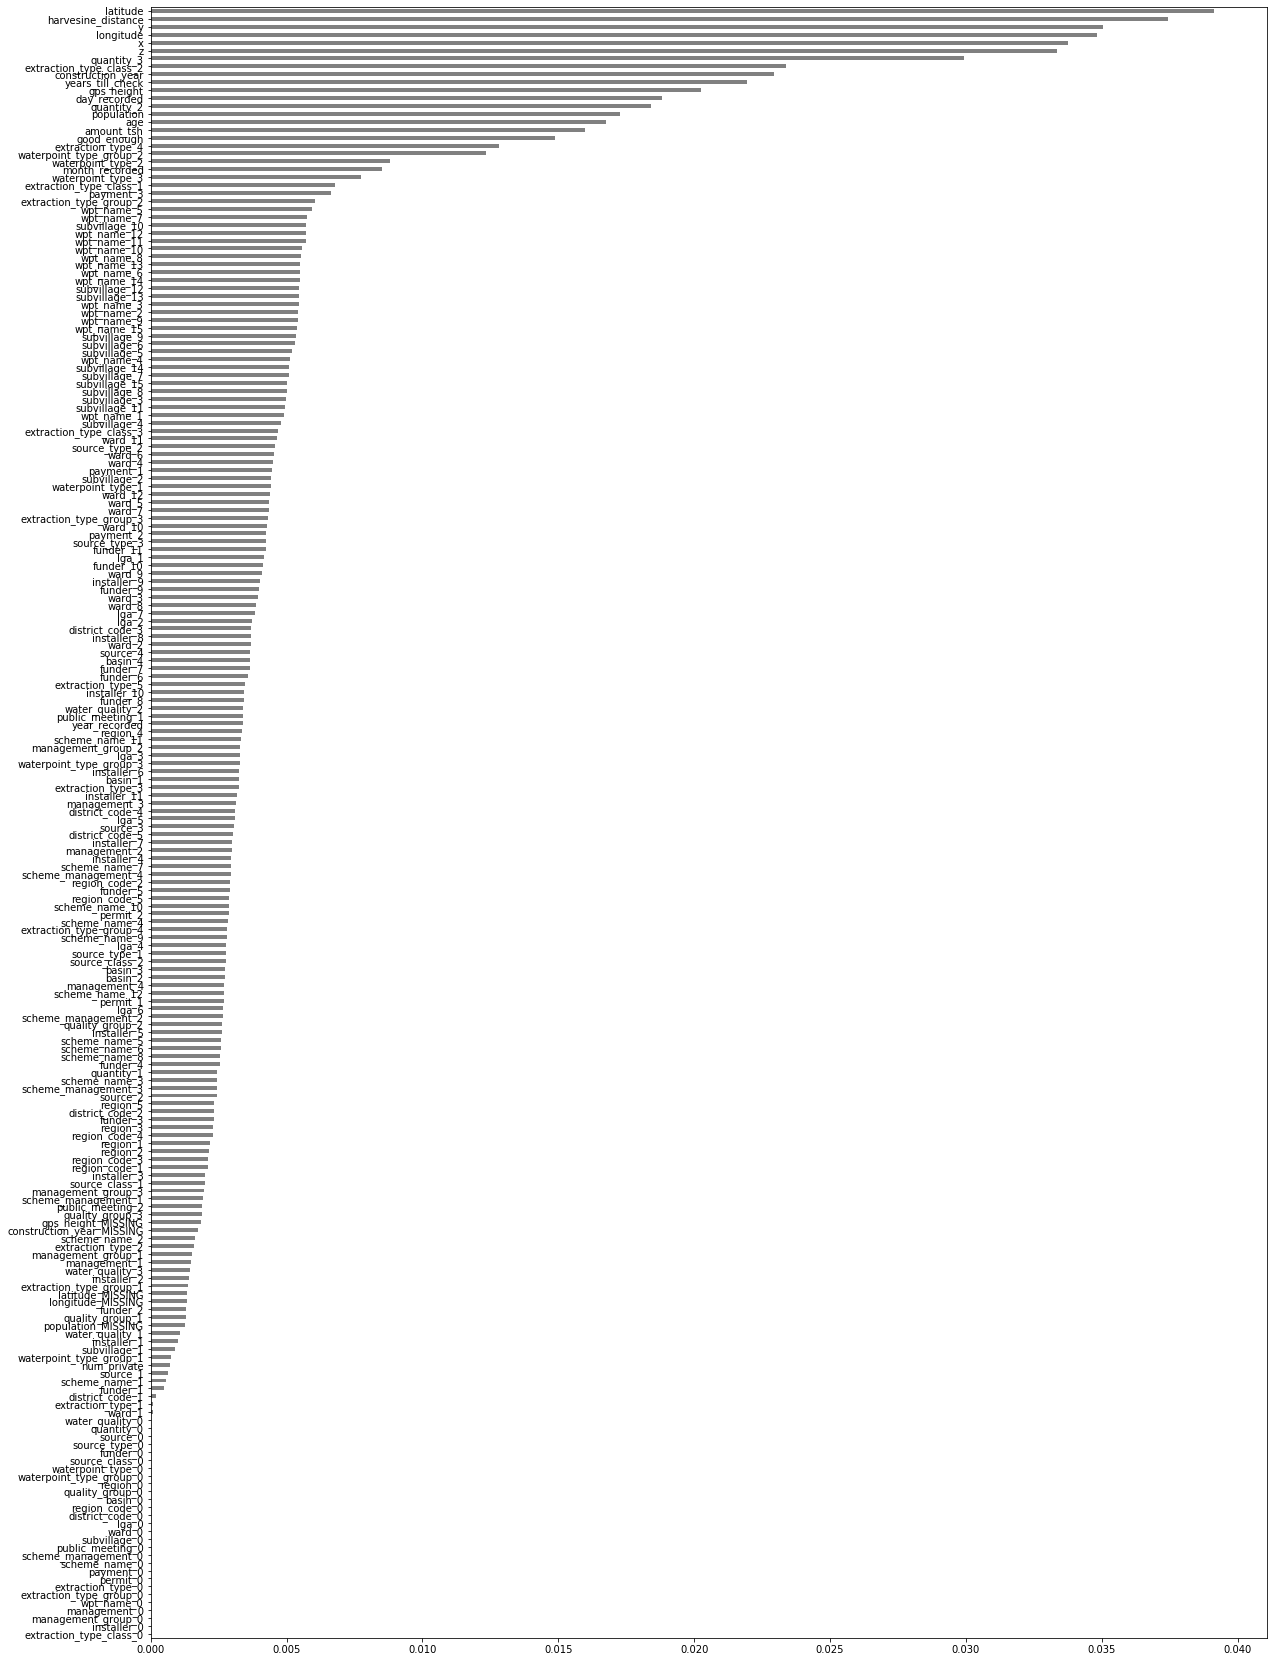

In [31]:
# Plot the feature importances
model = rf.named_steps['randomforestclassifier']
encoder = rf.named_steps['binaryencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

In [33]:
#playing with xgboost
!pip install xgboost

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xg = make_pipeline(
    ce.BinaryEncoder(),   
    XGBClassifier(max_depth=6, eta=0.3, n_estimators=1000, 
                  n_jobs=-1, min_child_weight=1, subsample=0.9, 
                  colsample_bytree=0.9, objective='multi:softmax', 
                  eval_metric='merror', gamma=0, scale_pos_weight=1, 
                  seed=42)
)

# Fit on train
xg.fit(X_train, y_train)


# Score on val
print('Train Accuracy:', xg.score(X_train, y_train))
print('Validation Accuracy:', xg.score(X_val, y_val))

Train Accuracy: 0.9672558922558923
Validation Accuracy: 0.8073232323232323


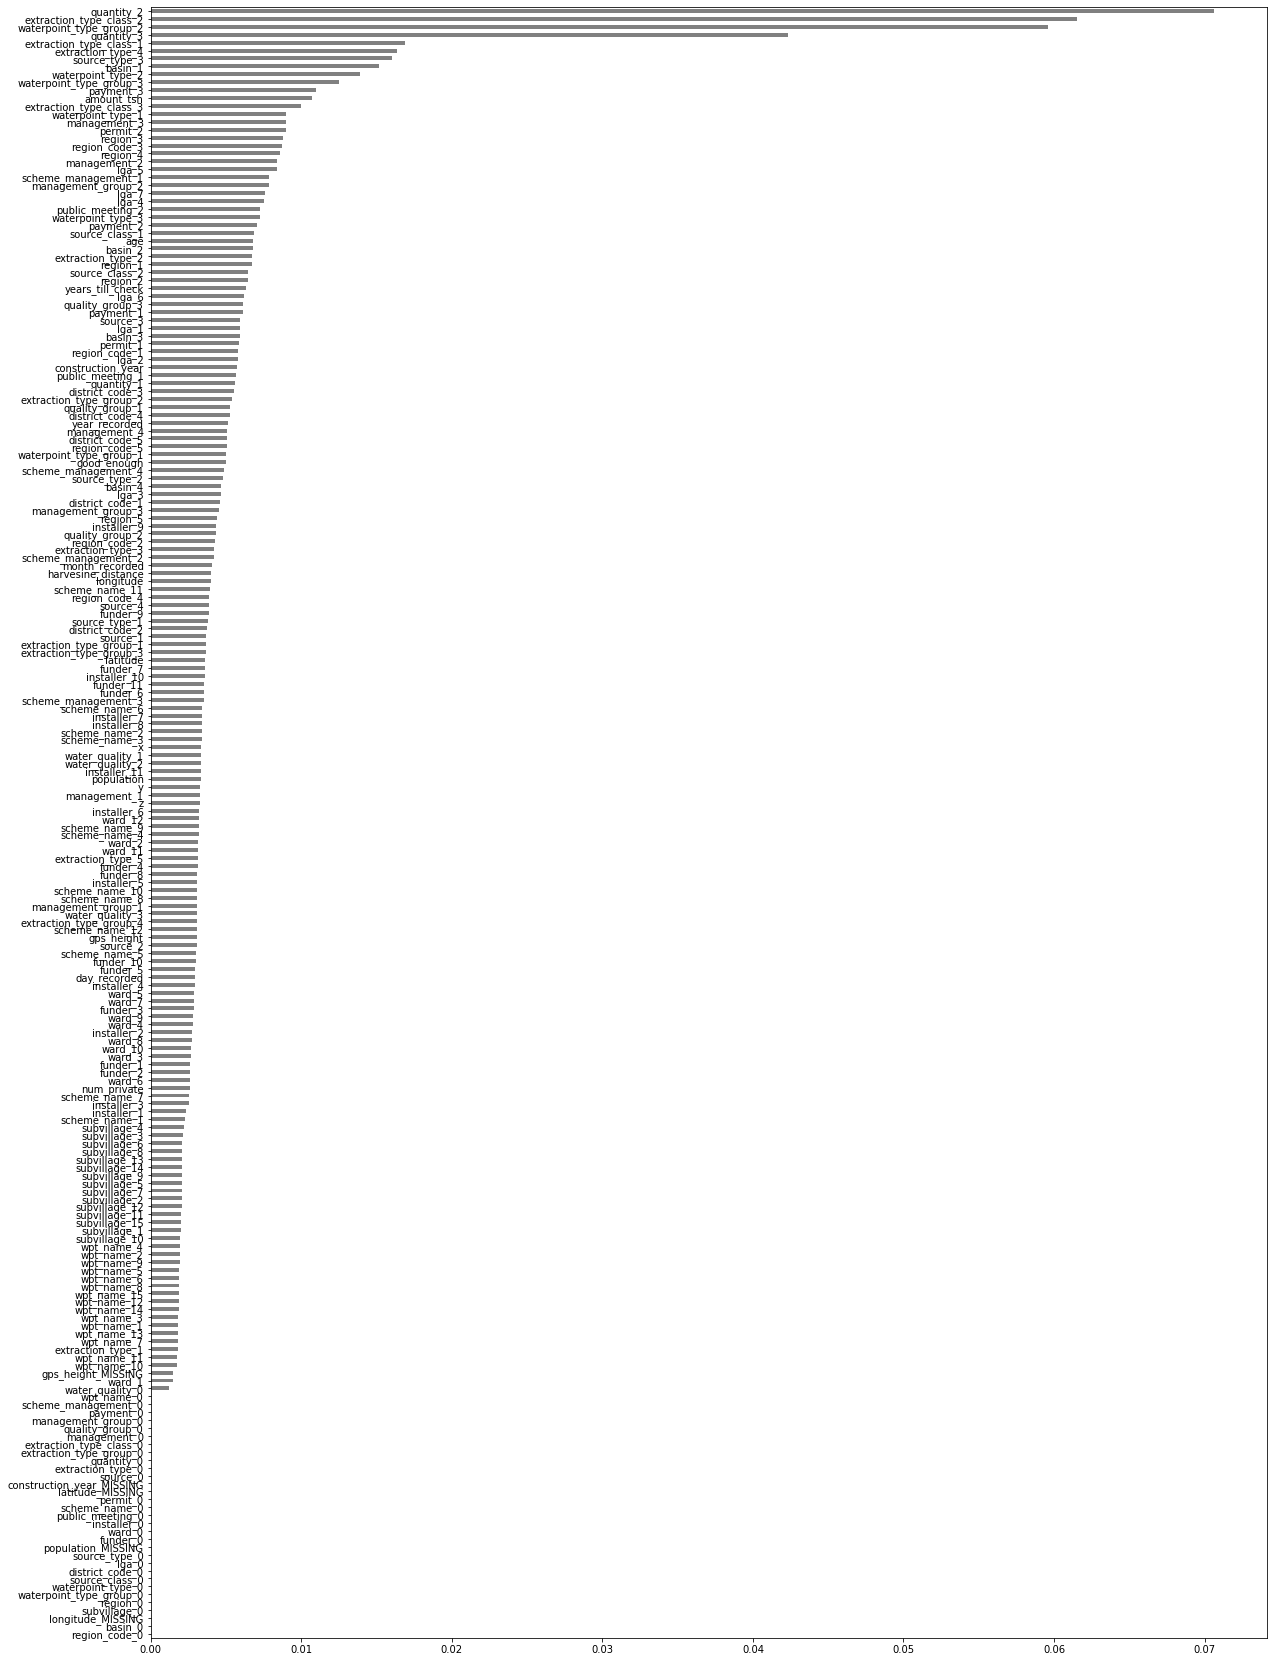

In [36]:
# Plot the feature importances
model = xg.named_steps['xgbclassifier']
encoder = xg.named_steps['binaryencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

In [0]:
assert all(X_train.columns == X_test.columns)

In [0]:
# Predict on test
y_pred = xg.predict(X_test)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Write a submission csv file

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Obukwelu_DSPT3_Unit_2_submission1.csv', index=False)

In [0]:
from google.colab import files
files.download('Obukwelu_DSPT3_Unit_2_submission2.csv')

In [51]:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [52]:
submission.shape

(14358, 2)